In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import re
import os

In [2]:
house_data = pd.read_csv('all_house_data_clean_no_coordinates.csv')

In [3]:
house_data.describe()

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,id,price,Avgift/månad
count,8825.000000,8.825000e+03,8.825000e+03,8825.000000,8.825000e+03,8825.000000,8825.000000,8.825000e+03,8825.000000,8825.000000,8.825000e+03,8825.000000
mean,3.452918,2.280384e+06,1.442855e+04,88.076487,6.640818e+07,13364.953541,30731.441473,1.669312e+05,650.150878,767141.203626,2.493654e+06,2430.452329
std,1.703441,1.502632e+06,2.312300e+05,40.582852,3.592868e+09,14439.199592,17301.263787,2.440966e+05,3620.898376,115576.648664,1.552425e+06,2121.961437
min,0.000000,0.000000e+00,0.000000e+00,17.500000,0.000000e+00,0.000000,1558.000000,-4.350000e+06,0.000000,467203.000000,7.250000e+04,0.000000
25%,2.000000,1.245000e+06,0.000000e+00,58.500000,1.937000e+03,3000.000000,16667.000000,0.000000e+00,0.000000,680051.000000,1.450000e+06,0.000000
50%,3.000000,1.995000e+06,0.000000e+00,78.000000,1.962000e+03,5280.000000,28788.000000,1.150000e+05,0.000000,772478.000000,2.280000e+06,2856.000000
75%,5.000000,2.990000e+06,8.000000e+00,111.000000,1.980000e+03,26500.000000,42945.000000,3.050000e+05,698.000000,857225.000000,3.250000e+06,4115.000000
max,13.000000,1.997500e+07,7.650000e+06,424.000000,1.959198e+11,75800.000000,88235.000000,9.750000e+05,186355.000000,944890.000000,1.997500e+07,9174.000000


In [4]:
house_data.dtypes

Antal rum                float64
Begärt pris              float64
Biarea                   float64
Boarea                   float64
Byggår                   float64
Driftskostnad            float64
Pris per kvadratmeter    float64
Prisutveckling           float64
Tomtarea                 float64
address                   object
coordinate                object
id                       float64
map_url                   object
price                    float64
sale_date                 object
type                      object
url                       object
Avgift/månad             float64
Förening                  object
dtype: object

In [5]:
house_data.head()

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,address,coordinate,id,map_url,price,sale_date,type,url,Avgift/månad,Förening
0,5.0,1395000.0,20.0,168.0,1920.0,21518.0,9018.0,120000.0,707.0,Dalviksgatan 6,[58.41833602158281. 14.173516000689672],944890.0,https:maps.googleapis.commapsapijs?libraries=g...,1515000.0,2019-02-10,villa,saldavilla-5-tibro-tibro-kommun-dalviksgatan-6...,0.0,0
1,10.0,1295000.0,170.0,175.0,1912.0,57949.0,5714.0,-295000.0,1742.0,Mellbyvägen 138,[58.1423480849156. 12.581077812236193],944821.0,https:maps.googleapis.commapsapijs?libraries=g...,1000000.0,2019-02-09,villa,saldavilla-10-stora-mellby-alingsas-kommun-mel...,0.0,0
2,4.0,1595000.0,32.0,124.0,1985.0,29252.0,14516.0,205000.0,776.0,Åvägen 5,[57.59336826715258. 12.875525104278504],944820.0,https:maps.googleapis.commapsapijs?libraries=g...,1800000.0,2019-02-09,villa,saldavilla-4-kinnama-boras-kommun-avagen-5-944820,0.0,0
3,4.0,4300000.0,28.0,113.0,1983.0,23960.0,41593.0,400000.0,428.5,Gamla Tingstadsgatan 34A,[57.729935889695675. 11.975547588656331],944836.0,https:maps.googleapis.commapsapijs?libraries=g...,4700000.0,2019-02-09,radhus,saldaradhus-4-brunnsbo-goteborgs-kommun-gamla-...,0.0,0
4,3.0,1075000.0,0.0,74.5,0.0,4308.0,14430.0,0.0,0.0,Nygatan 20A,[58.38360603922884. 12.325171522845999],944876.0,https:maps.googleapis.commapsapijs?libraries=g...,1075000.0,2019-02-09,bostadsratt,saldabostadsratt-3-nordstan-vanersborgs-kommun...,4364.0,0


In [6]:
mask = (house_data['address'].str.contains('jonsered'))
house_data.loc[mask]

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,address,coordinate,id,map_url,price,sale_date,type,url,Avgift/månad,Förening


In [7]:
house_data['Prisutveckling_pct'] = house_data['Prisutveckling'] / house_data['price'] * 100

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e717518>,
      dtype=object)

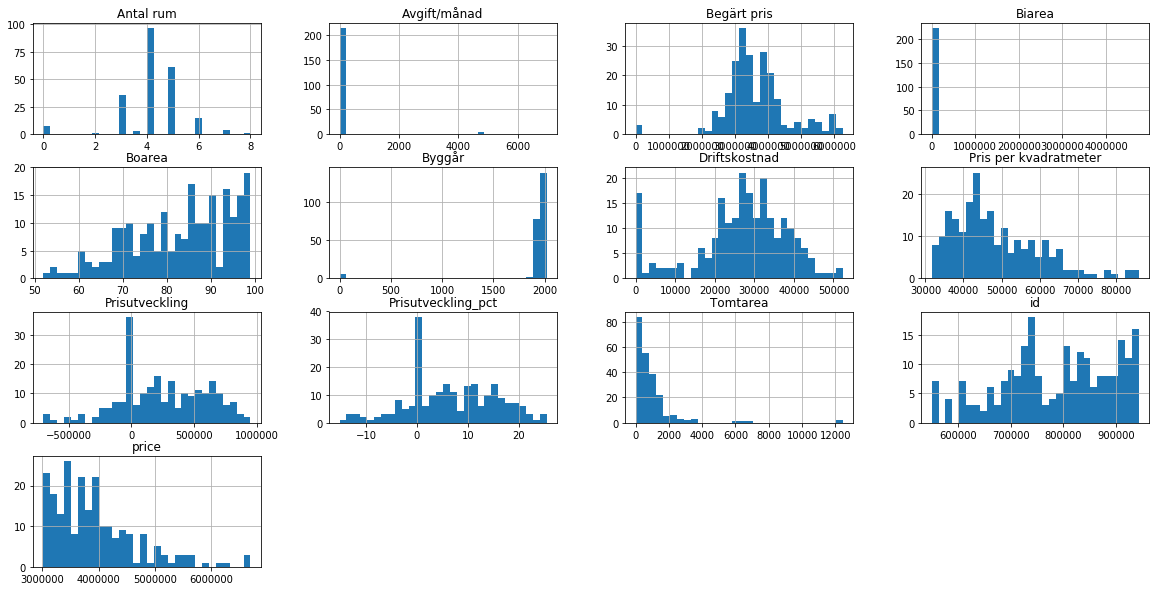

In [98]:
price_max = house_data['Prisutveckling_pct'].quantile(0.99)
price_min = house_data['Prisutveckling_pct'].quantile(0.01)

mask = ((house_data['Prisutveckling_pct'] > price_min) & 
        (house_data['Prisutveckling_pct'] < price_max) &
        (house_data['price'] > 3*10**6) &
        
        ((house_data['type'] == 'villa') | (house_data['type'] == 'radhus')) &
        (house_data['Boarea'] < 100) & (house_data['Boarea'] > 50)
       
       )

house_data_ = house_data.loc[mask].copy()
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
house_data_.hist(bins = 30,ax = ax)

In [99]:
4500000 / 70

64285.71428571428

In [100]:
house_data_.columns

Index(['Antal rum', 'Begärt pris', 'Biarea', 'Boarea', 'Byggår',
       'Driftskostnad', 'Pris per kvadratmeter', 'Prisutveckling', 'Tomtarea',
       'address', 'coordinate', 'id', 'map_url', 'price', 'sale_date', 'type',
       'url', 'Avgift/månad', 'Förening', 'Prisutveckling_pct'],
      dtype='object')

In [101]:
house_data_['temp'] = house_data_['price'] / house_data_['Boarea']

In [102]:
house_data_[['price','Begärt pris','Pris per kvadratmeter','temp','Boarea','Biarea']].head()

,price,Begärt pris,Pris per kvadratmeter,temp,Boarea,Biarea
56,4175000.0,3975000.0,43947.0,43947.368421,95.0,40.0
105,3725000.0,3490000.0,43824.0,43823.529412,85.0,53.0
142,3400000.0,3200000.0,40476.0,40476.190476,84.0,0.0
146,6125000.0,6250000.0,62500.0,62500.000000,98.0,50.0
379,3700000.0,3700000.0,67273.0,67272.727273,55.0,42.0


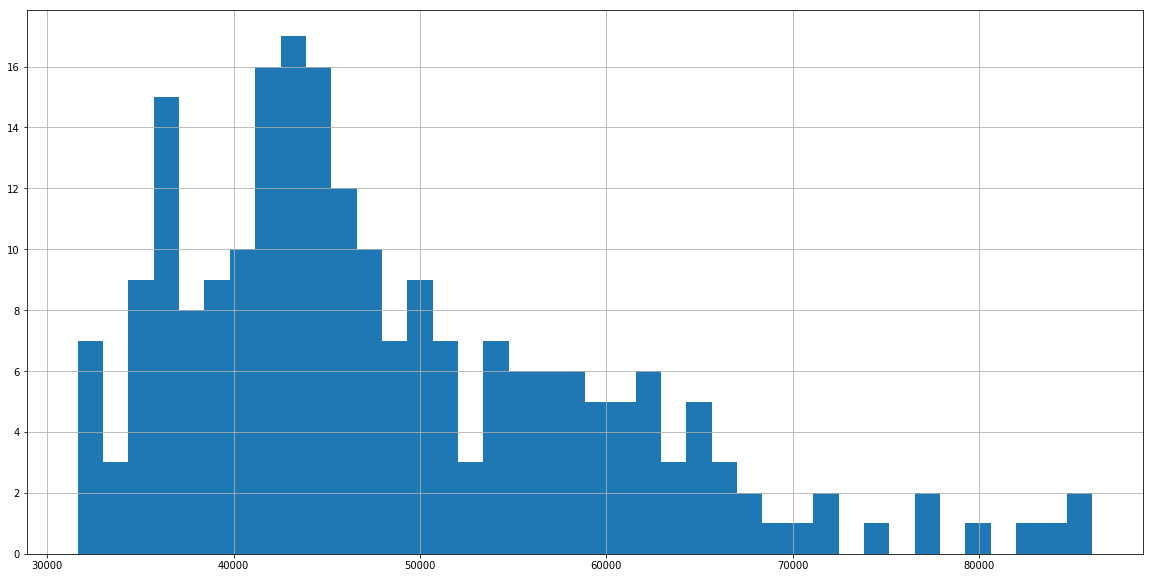

In [103]:
house_data_['Pris per kvadratmeter'].hist(bins = 40)

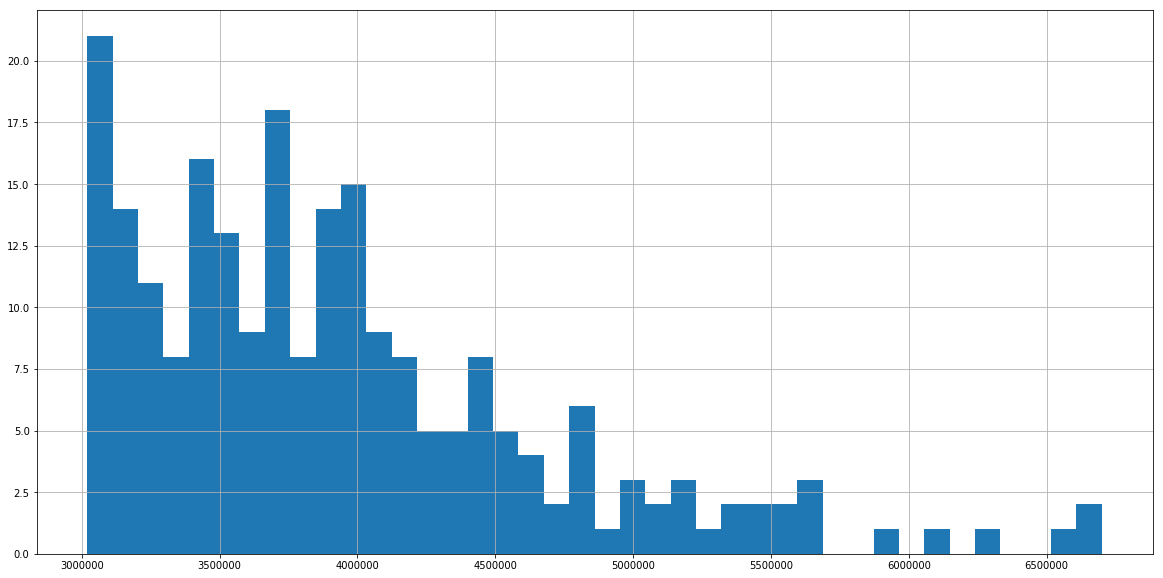

In [104]:
house_data_['price'].hist(bins = 40)

In [96]:
3000000 / 72

41666.666666666664

In [88]:
4500000 / 72

62500.0

In [69]:
house_data_['type'].unique()

array(['radhus', 'villa'], dtype=object)

In [97]:
4600000/(1.23)

3739837.398373984